In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 创建 200 个随机数(numpy linspace(), 均匀在(-0.5, 0.5)之间分布)
# 增加一个维度(ndarray[;, no.newaxis])
# x_data.shape = (200, 1)
x_data = np.linspace(start=-0.5, stop=0.5, num=200)[:, np.newaxis]
# print(x_data.shape)
# (200, 1)

# 创建噪声,采用高斯分布(numpy)
# noise.shape = x_data.shape
noise = np.random.normal(loc=0, scale=0.02, size=(x_data.shape))

# 创建 y_data 值,根据 x_data and noise
# y_data.shape = (200, 1)
y_data = np.square(x_data) + noise
# print(y_data.shape)

In [4]:
# 创建 2 个占位符
# 
# 作为神经网络输入层
x = tf.placeholder(dtype=tf.float32, shape=(None, 1))
y = tf.placeholder(dtype=tf.float32, shape=(None, 1))

In [8]:
# 创建神经网络(输入层\中间层\输出层)
# 
# 创建中间层
weight_L1 = tf.Variable(tf.random_normal(shape=(1, 10)))
biase_L1 = tf.Variable(tf.zeros(shape=(1, 10)) + 0.1)
wx_plus_b_L1 = tf.matmul(x, weight_L1) + biase_L1
# 
# 激活函数使用 tanh（双曲正切函数）
L1 = tf.nn.tanh(wx_plus_b_L1)

# L1.shape = (None, 10)

In [5]:
# 创建输出层
weight_L2 = tf.Variable(tf.random_normal(shape=(10, 1)))
biase_L2 = tf.Variable(tf.zeros(shape=(1, 1)))
wx_plus_b_L2 = tf.matmul(L1, weight_L2) + biase_L2

# 激活函数
prediction = tf.nn.tanh(wx_plus_b_L2)

In [6]:
# 训练阶段
# 
# 创建损失函数
# tf.reduce_mean() 求均值
loss = tf.reduce_mean(tf.square(y - prediction))

# 创建优化器(梯度下降),优化损失函数(使损失函数最小)
# 
# learning_rate 参数需要手动设置
# 最小化损失函数(loss)
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [7]:
# 初始化图中变量
init_op = tf.global_variables_initializer()

In [8]:
# 创建会话
with tf.Session() as sess:
#     在会话中，初始化图中变量
    sess.run(init_op)
#     训练网络
    for _ in range(2000):
        sess.run(train, feed_dict={x: x_data, y: y_data})

#     获取 预测值
    prediction_value = sess.run(prediction, feed_dict={x: x_data})

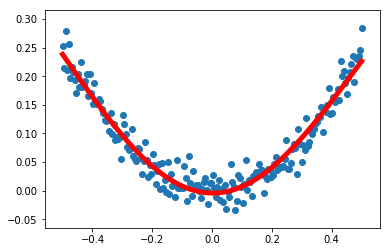

In [9]:
# 画图
plt.figure()
plt.scatter(x_data, y_data)
plt.plot(x_data, prediction_value, 'r-', lw=5)
plt.show()